- Summary
- Business Understanding
- Data Understanding


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv("data/tweet_product_company.csv", encoding = 'latin-1')

In [69]:
df.tail(50)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9043,Hey is anyone doing #sxsw signing up for the g...,NaN,Negative emotion
9044,Look everyone! Zomg @mention got an iPad 2 on ...,iPad,Positive emotion
9045,@mention you are my favorite-- thanks for comi...,iPhone,Positive emotion
9046,you know you are on the plane to #SXSW when u ...,NaN,No emotion toward brand or product
9047,Those of you at #SXSW I need the details on Go...,NaN,No emotion toward brand or product
9048,@mention You bet man! Kindle and Apple for sur...,Apple,Positive emotion
9049,@mention you can buy my used iPad and I'll pic...,NaN,Positive emotion
9050,@mention you can check out {link} for other #S...,NaN,No emotion toward brand or product
9051,@mention You can get an iPad 1 for under $350 ...,iPad,No emotion toward brand or product
9052,@mention You could buy a new iPad 2 tmrw at th...,NaN,Positive emotion


In [70]:
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


# Wes

In [71]:
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

- Removing one row where tweet_text is not available

In [72]:
df.dropna(subset=['tweet_text'], inplace=True)

In [73]:
df.isnull().sum()

tweet_text                                               0
emotion_in_tweet_is_directed_at                       5801
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [74]:
df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [75]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts() 

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [76]:
sample_tweets = df.sample(5, random_state=42)
sample_tweets.style.set_properties(**{'text-align': 'left'})

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
7169,Google Close to Launching New Social Network - Circles {link} #google #sxsw,nan,No emotion toward brand or product
2089,iPhone charging at #SXSW {link},nan,No emotion toward brand or product
2303,"The walk by Lady Bird Lake was lovely, but Google Maps travel times are not to be trusted. #SXSW",Other Google product or service,Negative emotion
928,"ÛÏ@mention Not a rumor: Apple doing popup store in downtown Austin for #SXSW & iPad 2 launch {link} Smart move, 1of many #dfcbto",Apple,Positive emotion
5895,"RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw via @mention @mention",nan,No emotion toward brand or product


- Labeling target column (is_there_an_emotion_directed_at_a_brand_or_product) 0-2:

   -0 = Negative emotion
   -1 = Positive emotion
   -2 = No emotion AND Can't tell
   

In [77]:
def custom_encoder(df):
    df.replace(to_replace ="No emotion toward brand or product", value =2, inplace=True)
    df.replace(to_replace ="Positive emotion", value =1, inplace=True)
    df.replace(to_replace ="Negative emotion", value =0, inplace=True)
    df.replace(to_replace ="I can't tell", value =2, inplace=True)

In [78]:
custom_encoder(df['is_there_an_emotion_directed_at_a_brand_or_product'])

In [79]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,1


 - Dropping emotion_in_tweet_is_directed_at for now just to analyze tweets and overall sentiment irregardless of brand.

In [80]:
df.drop(columns=['emotion_in_tweet_is_directed_at'], inplace=True)

In [81]:
df.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,1
2,@swonderlin Can not wait for #iPad 2 also. The...,1
3,@sxsw I hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,1


C:\Users\wjsmo\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


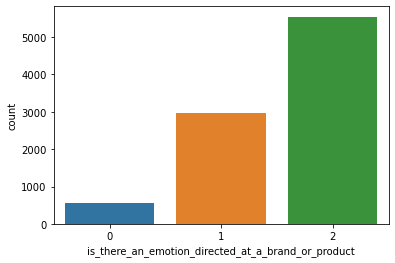

In [82]:
sns.countplot(df.is_there_an_emotion_directed_at_a_brand_or_product);

# Train test split

In [86]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_there_an_emotion_directed_at_a_brand_or_product'])
y = df['is_there_an_emotion_directed_at_a_brand_or_product']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [88]:
train_sample = X_train.sample(5, random_state=42)
train_sample.style.set_properties(**{'text-align': 'left'})

,tweet_text
899,"Brilliant move by Apple: before it even begins, Apple wins #SXSW {link}"
7432,{link} Report: Apple to Open Pop-Up Store at #SXSW
8515,omg ÛÏ@mention It's not a rumor: Apple is opening up a temporary store in downtown Austin for #SXSW and the iPad 2 launch {link}
2951,"#sxsw: @mention intrvw @mention ""Govt is not a vending machine [put in $, get svcs], it's a platform; iPhone was a teaching moment"""
8963,"Group #Texting War Heats Up: Fast Society Launches New Android App, Updates iPhone App: #SXSWÛ_ {link}"


# Preprocessing

In [ ]:
regular e

# Namsoo

# Harshitha

## EDA